# Group Number :- 7


*   Kapil Ahuja  (25PGAI0111)
*   Karthik Boinepally (25PGAI0127)
*   Nisarg Patel  (25PGAI0104)
*  Ayush Chakraborty  (25PGAI0112)  
*  Shivendra Pratap Singh  (25PGAI0025)



# Import Libraries

In [393]:
# !pip install statsforecast

In [394]:
# !pip install --upgrade scikit-learn

In [395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from statsmodels.tsa.arima.model import ARIMA as sm_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from statsforecast import StatsForecast
from statsforecast.models import HistoricAverage, Naive, RandomWalkWithDrift, SeasonalNaive, SimpleExponentialSmoothing, SimpleExponentialSmoothingOptimized ,Holt, HoltWinters, AutoARIMA, DynamicOptimizedTheta
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from prophet import Prophet
from dateutil.parser import parse

In [396]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data

## About Data

## Retail dataset of a global superstore for 4 years.

**Order ID:** Order ID of each Customer.

**Order Date:** The date, customer ordered the product.(YYYY/MM/DD)

**Ship Date:** The date product is shipped.(YYYY/MM/DD)

**Ship Mode:** Shipping Mode of the product: First class, Same day, Second class, Standard class.

**Customer ID:** ID to identify each Customer.

**Customer Name:** Name of the Customer.

**Segment:** Customer segmentation: Customer, Corporate, Home-office.

**Country:** United State: Country of residence of the Customer.

**City:** City of the Customer.

**State:** State of the Customer.

**Postal Code:** Postal Code of Customer.

**Region:** Region of residence: Central, East, South, West.

**Product ID:** ID of the Product.

**Category:** Category of the product ordered: Furniture, Office Supplies, Technology.

**Sub-Category:** Sub-Category of the product ordered.

**Product Name:** Name of the Product.

**Sales:** Sales of the Product.

**Quantity:** Quantity of the Product.

**Discount:** Percentage of Discount.

**Profit:** Profit/Loss of the Product.


## Loading Dataset

In [397]:
df_main = pd.read_csv('drive/MyDrive/dataset/Dataset- Superstore (2015-2018).csv')
df_main.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [398]:
df_main.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [399]:
df_main.shape

(9994, 21)

In [400]:
df_main['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

### Here we are forecasting the sales of office supplies products

In [401]:
OS_main=df_main.loc[df_main['Category']=='Office Supplies']
OS_main.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700


In [402]:
print('Starting date:',OS_main['Order Date'].min())
print('Ending date:',OS_main['Order Date'].max())

Starting date: 2014/01/03
Ending date: 2017/12/30


In [403]:
### Check out missing values:
OS_main.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [404]:
OS_main= OS_main.groupby('Order Date')['Sales'].sum().reset_index()
OS_main.head()

,Order Date,Sales
0,2014/01/03,16.448
1,2014/01/04,288.060
2,2014/01/05,19.536
3,2014/01/06,685.340
4,2014/01/07,10.430


In [405]:
OS_main['Order Date'] = pd.to_datetime(df_main['Order Date'])
OS_main = OS_main.set_index('Order Date')
OS_main

,Sales
Order Date,
2016-11-08,16.448
2016-11-08,288.060
2016-06-12,19.536
2015-10-11,685.340
2015-10-11,10.430
...,...
2014-09-29,814.594
2014-09-29,13.248
2014-09-29,1091.244


# Exploratory Data Analysis (EDA)

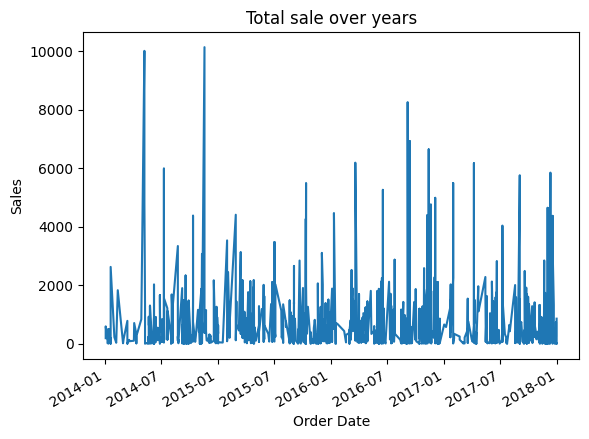

In [406]:
OS_main['Sales'].plot()
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Total sale over years')
plt.show()

### GroupBy Data Monthly for better understanding the seasonality

In [407]:
#create new DataFrame
monthly_OS = pd.DataFrame()
# Resample the 'Sales' data to a monthly frequency and take the mean for each month
monthly_OS['Sales'] = OS_main['Sales'].resample('MS').mean()
monthly_OS.tail()

,Sales
Order Date,
2017-08-01,431.133167
2017-09-01,559.963526
2017-10-01,511.456241
2017-11-01,407.582646
2017-12-01,686.791242


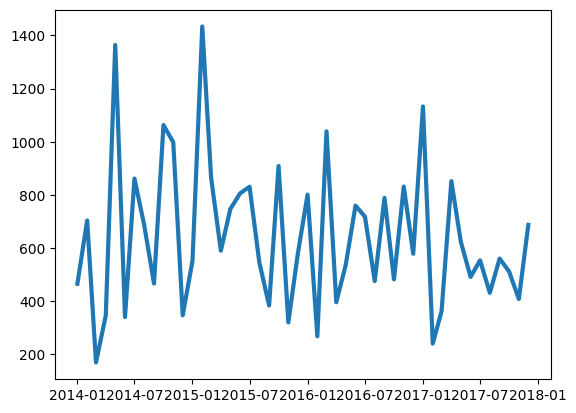

In [408]:
#plot weekly sales data
plt.plot(monthly_OS.index, monthly_OS.Sales, linewidth=3)

In [409]:
OS_main['year'] = [d.year for d in OS_main.index]
OS_main['month'] = [d.strftime('%b') for d in OS_main.index]
years= OS_main['year'].unique()
years

array([2016, 2015, 2014, 2017])

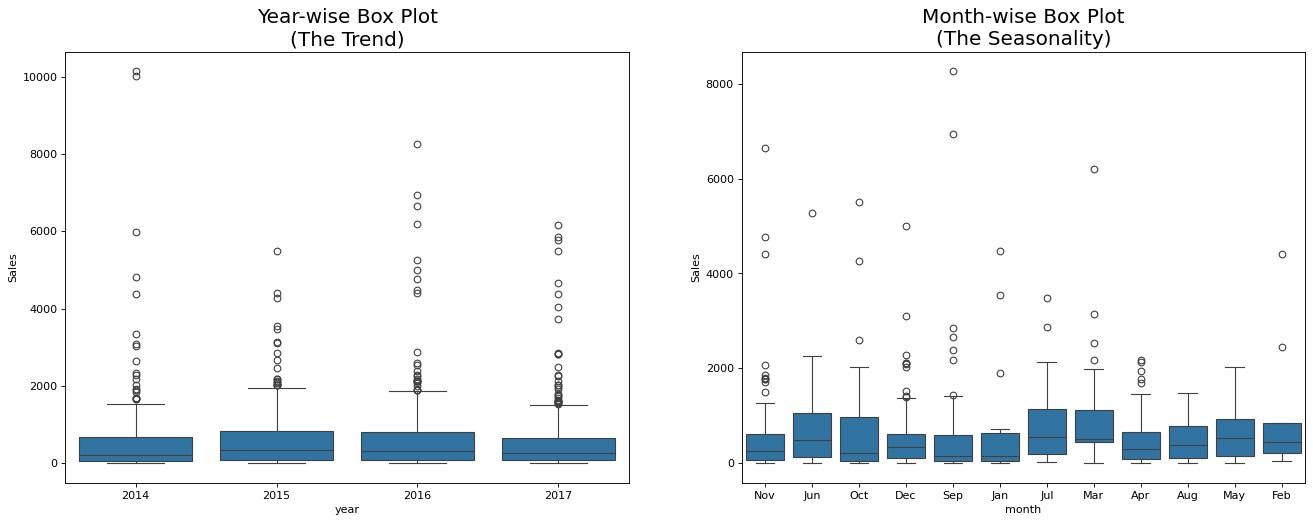

In [410]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Sales', data=OS_main, ax=axes[0])
sns.boxplot(x='month', y='Sales', data=OS_main.loc[~OS_main.year.isin([2014,2017]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

# Series Decomposition ( Additive Decomposition )

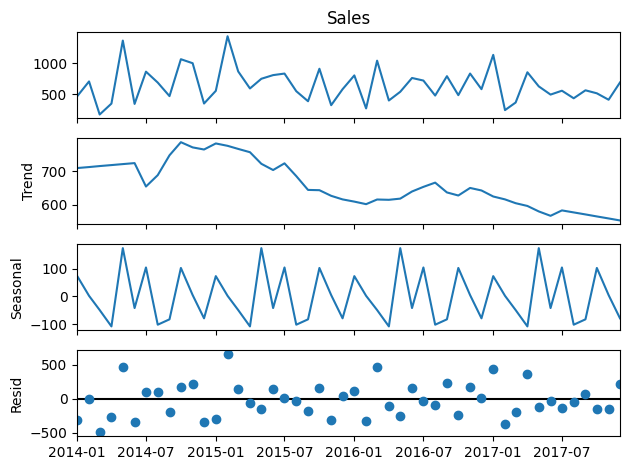

In [411]:
# Additive Decomposition
additive_decomposition = seasonal_decompose(monthly_OS['Sales'], model='additive',extrapolate_trend="freq")
additive_decomposition.plot()
plt.show()

In [412]:
additive_decomposition.seasonal

Order Date
2014-01-01     73.506863
2014-02-01      2.285114
2014-03-01    -49.119895
2014-04-01   -108.356488
2014-05-01    174.745504
2014-06-01    -41.945256
2014-07-01    104.858700
2014-08-01   -102.162301
2014-09-01    -82.763856
2014-10-01    103.082977
2014-11-01      4.962920
2014-12-01    -79.094283
2015-01-01     73.506863
2015-02-01      2.285114
2015-03-01    -49.119895
2015-04-01   -108.356488
2015-05-01    174.745504
2015-06-01    -41.945256
2015-07-01    104.858700
2015-08-01   -102.162301
2015-09-01    -82.763856
2015-10-01    103.082977
2015-11-01      4.962920
2015-12-01    -79.094283
2016-01-01     73.506863
2016-02-01      2.285114
2016-03-01    -49.119895
2016-04-01   -108.356488
2016-05-01    174.745504
2016-06-01    -41.945256
2016-07-01    104.858700
2016-08-01   -102.162301
2016-09-01    -82.763856
2016-10-01    103.082977
2016-11-01      4.962920
2016-12-01    -79.094283
2017-01-01     73.506863
2017-02-01      2.285114
2017-03-01    -49.119895
2017-04-01   -

# Forcasting with Benchmark Models




In [413]:
#Setting unique_id as 1
monthly_OS.reset_index(inplace=True)
monthly_OS["unique_id"] = "1"
monthly_OS.columns = ["ds","y","unique_id"]
monthly_OS.head()

,ds,y,unique_id
0,2014-01-01,465.195522,1
1,2014-02-01,703.377333,1
2,2014-03-01,168.809556,1
3,2014-04-01,345.347750,1
4,2014-05-01,1363.929625,1


In [414]:
train_start = "2014-01-01"
train_end = "2017-08-01"
test_start = "2017-09-01"
test_end = "2017-12-01"

In [415]:
train_df=monthly_OS[:-6]
test_df=monthly_OS[-6:]

In [416]:
# Printing the shape of data
print(train_df.shape, test_df.shape)

(42, 3) (6, 3)


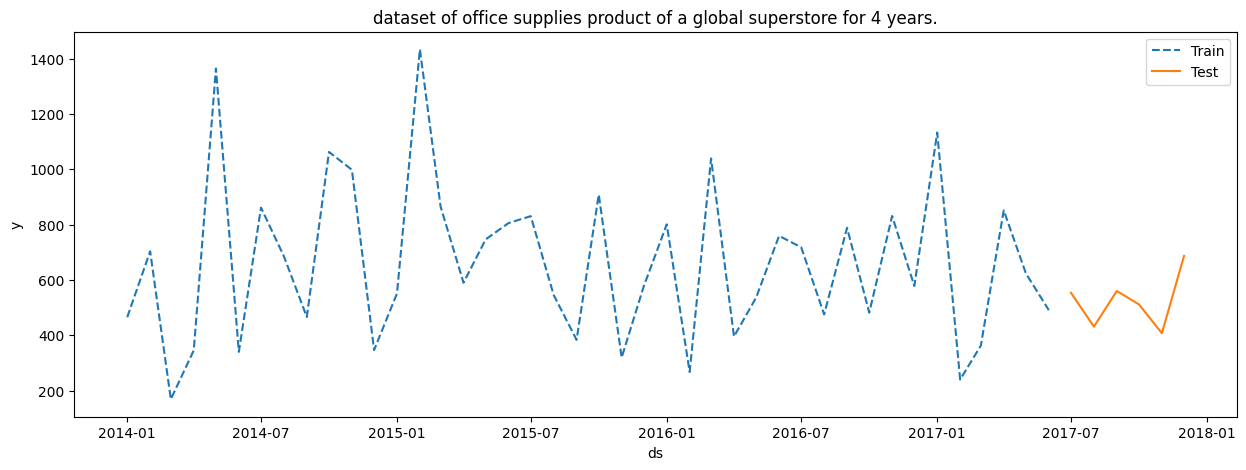

In [417]:
#Plot training and testing data using Seaborn
plt.figure(figsize=(15,5))
sns.lineplot(data=train_df,x="ds", y="y", label="Train", linestyle="--")
sns.lineplot(data=test_df, x="ds", y="y", label="Test")
plt.title("dataset of office supplies product of a global superstore for 4 years.");
plt.show()

In [418]:
#Forecast horizon = number of months that we want to forecast into the future
horizon = len(test_df)

In [419]:
#Initialize empty models list that we'll add models to
models = []

In [420]:
# Average model
models.append(HistoricAverage(alias="Average"))

#Naive model
models.append(Naive(alias="Naive"))

#Drift model
models.append(RandomWalkWithDrift(alias="Drift"))

#Seasonal Naive model
models.append(SeasonalNaive(season_length=12, alias="Seasonal Naive"))

# Simple Exponential Smoothing Optimized algorithm with alpha being determined by the algorithm
models.append(SimpleExponentialSmoothingOptimized(alias = "SESOpt"))

#Holt's Model or Double Exponential Smoothing
models.append(Holt(alias = "Holt"))

#Holt-Winter's Model or Triple Exponential Smoothing
models.append(HoltWinters(season_length=12, alias = "HoltWinters"))

#Theta Model
models.append(DynamicOptimizedTheta(season_length=12, decomposition_type="additive", alias="Theta"))

In [421]:
sf = StatsForecast(df=train_df,
                   models=models,
                   freq='M', # monthly frequency
                   n_jobs=-1)

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [422]:
#Fit the model
sf.fit()

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[Average,Naive,Drift,Seasonal Naive,SESOpt,Holt,HoltWinters,Theta])

In [423]:
#See fitted values from the models
result_avg = sf.fitted_[0,0].model_
result_naive = sf.fitted_[0,1].model_
result_drift = sf.fitted_[0,2].model_
result_snaive = sf.fitted_[0,3].model_
result_sesopt = sf.fitted_[0,4].model_
result_holt = sf.fitted_[0,5].model_
result_holtwinters = sf.fitted_[0,6].model_
result_theta = sf.fitted_[0,7].model_

In [424]:
#Extract only fitted values from the models into a dataframe
fitted_df = pd.DataFrame()

fitted_df["fitted_avg"] = result_avg.get("fitted")
fitted_df["fitted_naive"] = result_naive.get("fitted")
fitted_df["fitted_drift"] = result_drift.get("fitted")
fitted_df["fitted_snaive"] = result_snaive.get("fitted")
fitted_df["fitted_sesopt"] = result_sesopt.get("fitted")
fitted_df["fitted_holt"] = result_holt.get("fitted")
fitted_df["fitted_holtwinters"] = result_holtwinters.get("fitted")
fitted_df["fitted_theta"] = result_theta.get("fitted")

#Also have the timestamp
fitted_df["ds"]=monthly_OS["ds"]

In [425]:
#See the first 5 rows
fitted_df.head()

,fitted_avg,fitted_naive,fitted_drift,fitted_snaive,fitted_sesopt,fitted_holt,fitted_holtwinters,fitted_theta,ds
0,660.30658,NaN,NaN,NaN,NaN,693.112398,773.437144,465.195526,2014-01-01
1,660.30658,465.195526,465.820618,NaN,465.195526,691.481592,695.276872,255.857544,2014-02-01
2,660.30658,703.377319,704.002441,NaN,487.529388,689.875959,648.038739,300.609528,2014-03-01
3,660.30658,168.809555,169.434662,NaN,457.643616,688.164904,546.522452,287.429535,2014-04-01
4,660.30658,345.347748,345.972839,NaN,447.113861,686.437381,804.406557,293.221344,2014-05-01


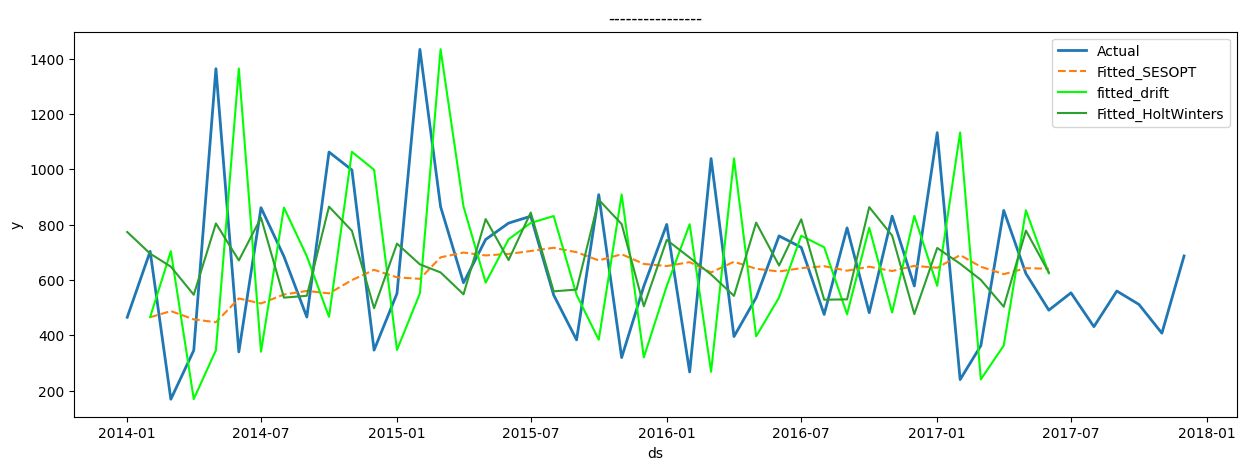

In [426]:
#Plot the actuals vs. fitted values for all SES Optimized, Holt's and Holt-Winter's models
plt.figure(figsize=(15,5))

#Actual data
sns.lineplot(data=monthly_OS, x="ds", y="y", label="Actual", linewidth=2)

#SES Optimized model fitted values
sns.lineplot(data=fitted_df,x="ds", y="fitted_sesopt", label="Fitted_SESOPT", linestyle="--", )

#Holt's model fitted values
sns.lineplot(data=fitted_df, x="ds", y="fitted_drift", label="fitted_drift", color="lime")

#Holt-Winter's model fitted values
sns.lineplot(data=fitted_df, x="ds", y="fitted_holtwinters", label="Fitted_HoltWinters")

#Add title and show
plt.title("----------------");
plt.show()

## Forcast Using Model

In [427]:
#Forecast
Y_hat = sf.forecast(h=horizon, fitted=True)
Y_hat.head()

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,Average,Naive,Drift,Seasonal Naive,SESOpt,Holt,HoltWinters,Theta
unique_id,,,,,,,,,
1,2017-06-30,660.30658,490.824799,491.449890,717.651978,626.741699,626.541626,786.818359,622.832764
1,2017-07-31,660.30658,490.824799,492.075012,475.377045,626.741699,624.956238,497.942261,622.832764
1,2017-08-31,660.30658,490.824799,492.700104,788.282349,626.741699,623.370789,500.868347,622.832764
1,2017-09-30,660.30658,490.824799,493.325226,481.691833,626.741699,621.785400,824.618774,622.832764
1,2017-10-31,660.30658,490.824799,493.950317,830.947632,626.741699,620.199951,732.007568,622.832764


In [428]:
#See the fitted values
values=sf.forecast_fitted_values()
values.head()

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,y,Average,Naive,Drift,Seasonal Naive,SESOpt,Holt,HoltWinters,Theta
unique_id,,,,,,,,,,
1,2014-01-01,465.195526,660.30658,NaN,NaN,NaN,NaN,693.112427,773.437134,465.195526
1,2014-02-01,703.377319,660.30658,465.195526,465.820618,NaN,465.195526,691.481567,695.276855,255.857544
1,2014-03-01,168.809555,660.30658,703.377319,704.002441,NaN,487.529388,689.875977,648.038757,300.609528
1,2014-04-01,345.347748,660.30658,168.809555,169.434662,NaN,457.643616,688.164917,546.522461,287.429535
1,2014-05-01,1363.929565,660.30658,345.347748,345.972839,NaN,447.113861,686.437378,804.406555,293.221344


In [429]:
#Get the actual 12 month values of forecast duration
actual_ts = test_df["y"]

#Create a list with the model aliases
model_names = [str(model) for model in models]

#Initialize error dataframe
error_df = pd.DataFrame(columns=model_names, index=["MAE","MAPE","MSE","RMSE"])

#Print the errors for each model
for model in model_names:

    #Evaluate the model MAE
    model_mae = np.round(mean_absolute_error(actual_ts, Y_hat[model]),2)

    #Evaluate the model MAPE
    model_mape = np.round(100*mean_absolute_percentage_error(actual_ts, Y_hat[model]),2)

    #Evaluate the model MSE
    model_mse = np.round(mean_squared_error(actual_ts, Y_hat[model]),2)

    #Evaluate the model RMSE
    model_rmse = np.sqrt(mean_squared_error(actual_ts, Y_hat[model]))

    #Save errors in error dataframe
    error_df.loc[:,model] = (model_mae, model_mape, model_mse, model_rmse)

In [430]:
#Show the error dataframe on the console
error_df

,Average,Naive,Drift,Seasonal Naive,SESOpt,Holt,HoltWinters,Theta
MAE,144.07,81.89,81.16,166.4,121.69,120.24,206.19,119.08
MAPE,30.89,15.08,15.01,34.37,25.93,25.52,40.67,25.35
MSE,26788.02,9671.14,9470.2,45491.25,18836.08,18158.73,53911.66,18056.49
RMSE,163.670454,98.341946,97.314941,213.286782,137.244616,134.754345,232.188846,134.374449


In [431]:
#Order the models in ascending order of MAPE
error_df.loc["MAPE",~error_df.columns.isin(["Best model"])].sort_values()

Drift             15.01
Naive             15.08
Theta             25.35
Holt              25.52
SESOpt            25.93
Average           30.89
Seasonal Naive    34.37
HoltWinters       40.67
Name: MAPE, dtype: object

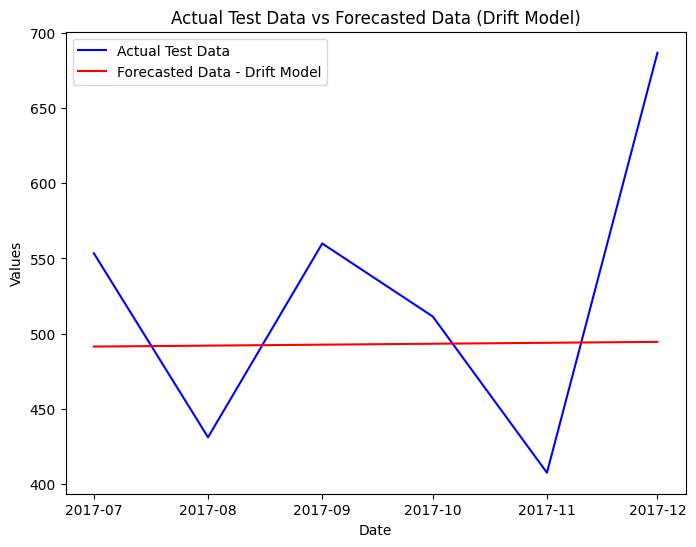

In [432]:
# Plotting
plt.figure(figsize=(8, 6))
plt.plot(test_df['ds'], test_df['y'], label='Actual Test Data', color='blue')  # Use 'y' as it's the column with data
plt.plot(test_df['ds'], Y_hat["Drift"], label='Forecasted Data - Drift Model', color='red')
plt.title('Actual Test Data vs Forecasted Data (Drift Model)')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

### Drift Model perform the best among all

# Statistical Properties




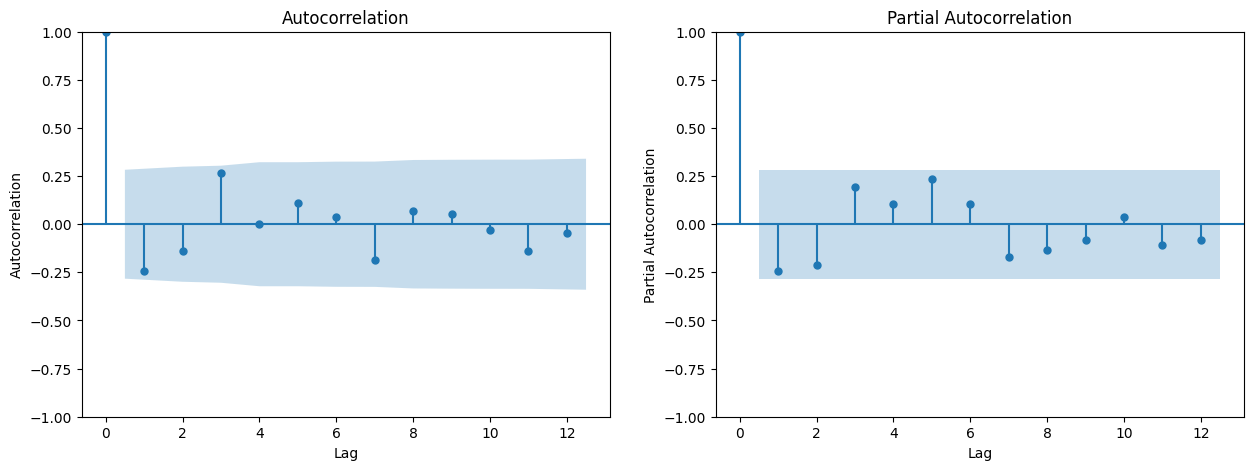

In [193]:
#Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15,5))

#Plot ACF
plot_acf(monthly_OS["y"], lags=12, ax=axes[0])
axes[0].set_ylabel("Autocorrelation")
axes[0].set_xlabel("Lag")

#Plot PACF
plot_pacf(monthly_OS["y"], lags=12, ax=axes[1])
axes[1].set_ylabel("Partial Autocorrelation")
axes[1].set_xlabel("Lag")

plt.show()

## Ljung-Box Test

### Null hypothesis: No autocorrelation at lag k
### If p-value < 0.05, reject the null hypothesis and conclude that autocorrelation is present

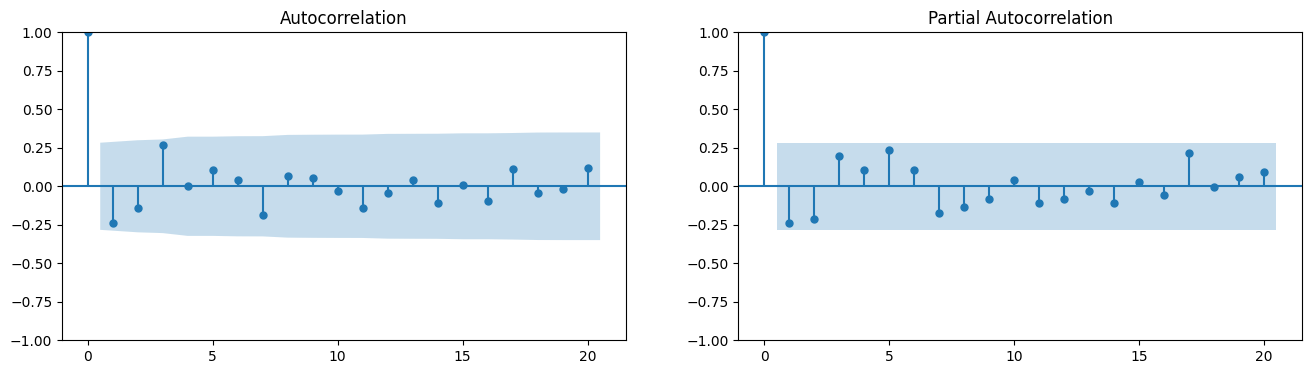

Ljung-Box Test Results:
      lb_stat  lb_pvalue
1    2.977725   0.084418
2    3.988796   0.136096
3    7.765324   0.051119
4    7.765342   0.100562
5    8.423892   0.134370
6    8.506001   0.203325
7   10.485753   0.162676
8   10.769562   0.215101
9   10.927927   0.280682
10  10.978468   0.359198
No significant autocorrelation detected in the series based on Ljung-Box test.


In [194]:
normal_series =  monthly_OS['y'].dropna()
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(normal_series, lags=20, ax=axes[0])
plot_pacf(normal_series, lags=20, ax=axes[1])
plt.show()

# Ljung-Box Test for multiple lags
ljung_box_results = acorr_ljungbox(normal_series, lags=range(1, 11), return_df=True)
print("Ljung-Box Test Results:")
print(ljung_box_results)

# Check if any p-value is less than 0.05
autocorrelation_detected = any(ljung_box_results['lb_pvalue'] < 0.05)

if autocorrelation_detected:
    print("Significant autocorrelation detected in the series based on Ljung-Box test.")
else:
    print("No significant autocorrelation detected in the series based on Ljung-Box test.")

# Stationary Test of the Dataset

In [195]:
# Define a function to perform the ADF test
def adf_test(series, title=''):
    print(f'ADF Test for {title} series:')
    adf_result = adfuller(series)
    print(f'Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')

    if adf_result[1] < 0.05:
        print("Result: The series is stationary")
    else:
        print("Result: The series is not stationary")
    print('\n')

# Perform ADF tests on the original series
adf_test(monthly_OS['y'], title='Original')

# Differencing the series
monthly_OS['y_diff'] = monthly_OS['y'].diff().dropna()

# Perform ADF tests on the differenced series
adf_test(monthly_OS['y_diff'].dropna(), title='Differenced')

ADF Test for Original series:
Statistic: -1.6302377773495826
p-value: 0.46736625351082706
Result: The series is not stationary


ADF Test for Differenced series:
Statistic: -7.595086426275282
p-value: 2.472567281723804e-11
Result: The series is stationary




In [196]:
# Define a function to perform the KPSS test
def kpss_test(series, title=''):
    print(f'KPSS Test for {title} series:')
    kpss_result = kpss(series, regression='c')
    print(f'Statistic: {kpss_result[0]}')
    print(f'p-value: {kpss_result[1]}')

    if kpss_result[1] > 0.05:
        print("Result: The series is stationary")
    else:
        print("Result: The series is not stationary")
    print('\n')

# Perform KPSS tests on the original series
kpss_test(monthly_OS['y'], title='Original')

# Differencing the series
monthly_OS['y_diff'] = monthly_OS['y'].diff().dropna()

# Perform KPSS tests on the differenced series
kpss_test(monthly_OS['y_diff'].dropna(), title='Differenced')

KPSS Test for Original series:
Statistic: 0.2246467287233061
p-value: 0.1
Result: The series is stationary


KPSS Test for Differenced series:
Statistic: 0.13468128856713754
p-value: 0.1
Result: The series is stationary




<ipython-input-196-b872b212cc9f>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c')
<ipython-input-196-b872b212cc9f>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c')


### We move further with differenced series




### ACF and PACF plot of differenced series

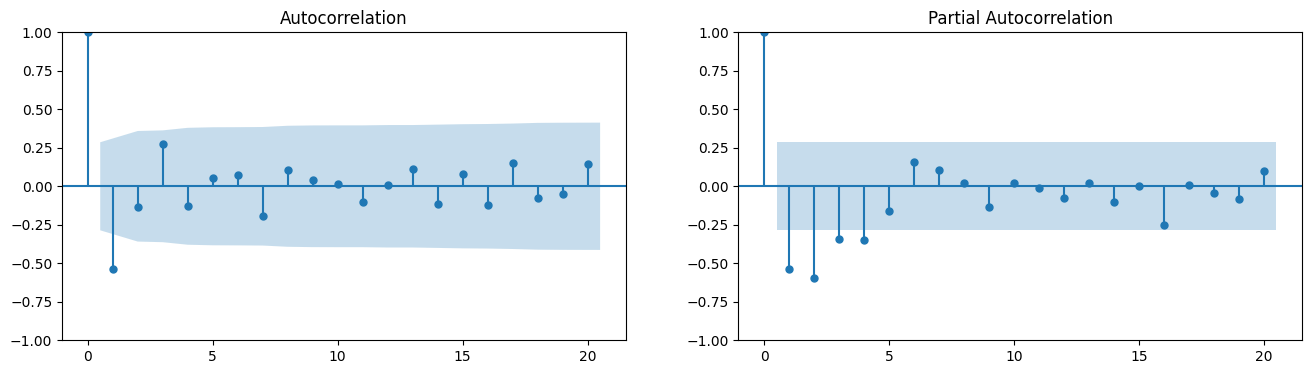

In [197]:
differenced_series =  monthly_OS['y'].diff().dropna()
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(differenced_series, lags=20, ax=axes[0])
plot_pacf(differenced_series, lags=20, ax=axes[1])
plt.show()

# Univarient Forecasting

# ARIMA

In [198]:
train_df = monthly_OS.iloc[:-6]
test_df = monthly_OS.iloc[-6:]

In [199]:
model = sm_arima(train_df['y'], order=(2, 1, 1))
arima_fit = model.fit()

# Summary of the ARIMA model
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   42
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -289.402
Date:                Thu, 20 Jun 2024   AIC                            586.805
Time:                        20:07:42   BIC                            593.659
Sample:                             0   HQIC                           589.301
                                 - 42                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5269      0.192     -2.739      0.006      -0.904      -0.150
ar.L2         -0.4250      0.166     -2.562      0.010      -0.750      -0.100
ma.L1         -0.6833      0.186     -3.677      0.0

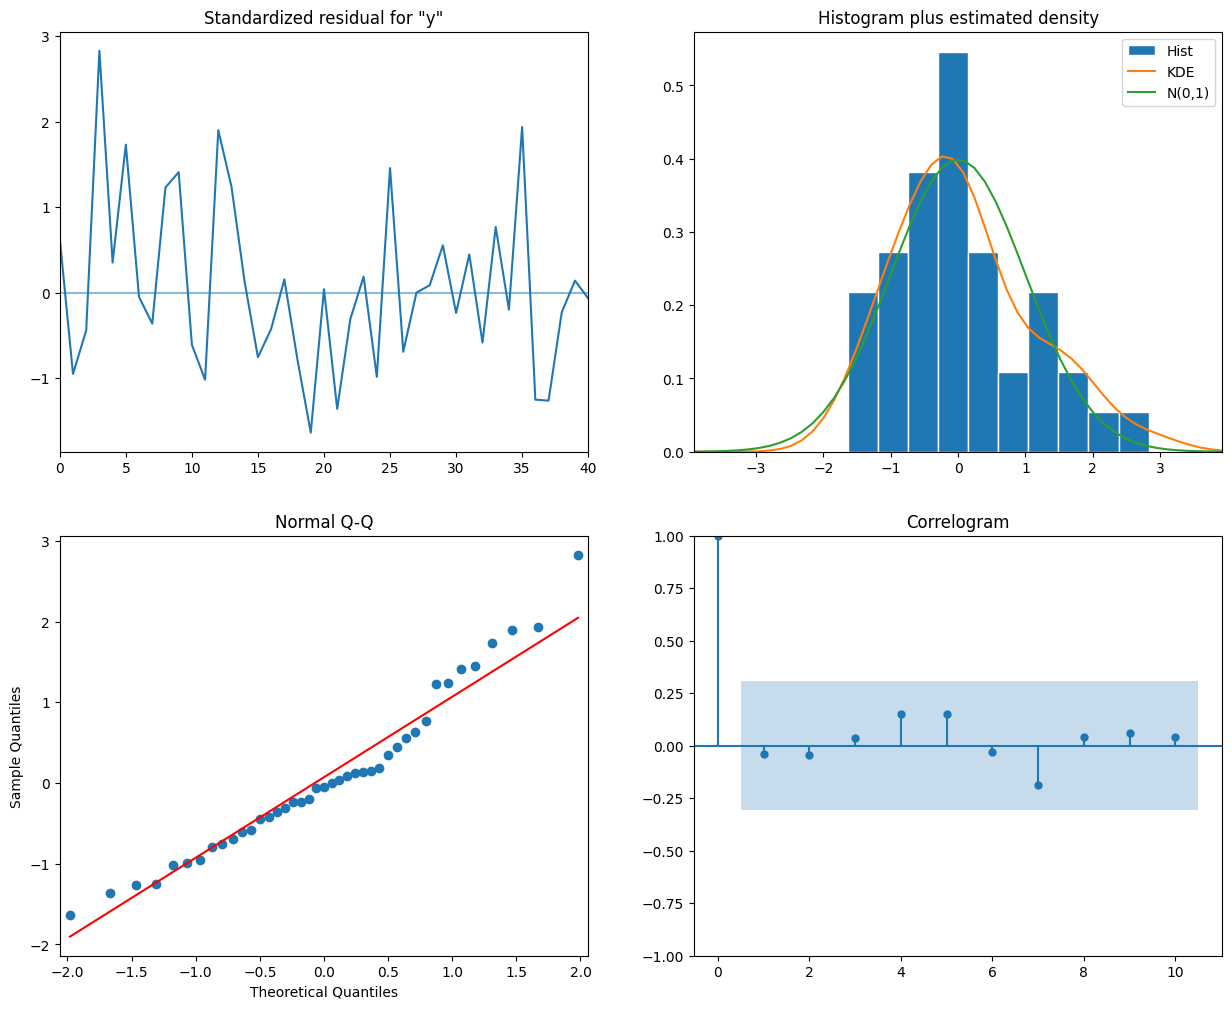

In [200]:
arima_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

## Forecast

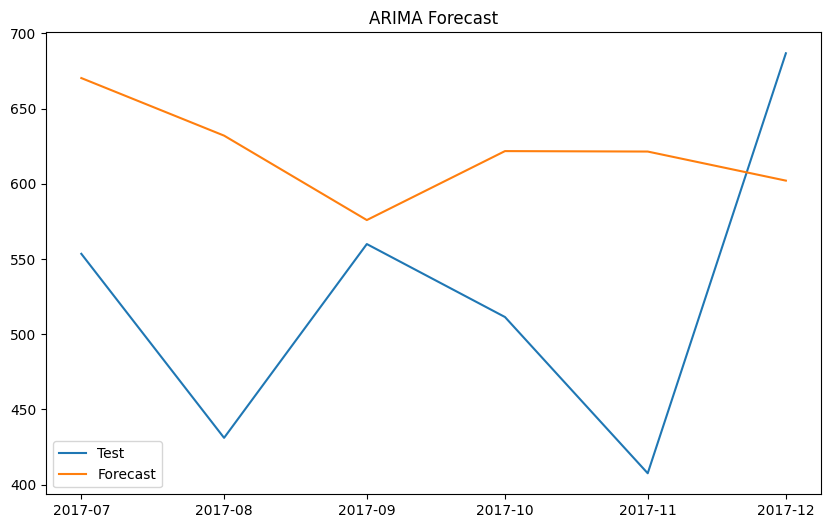

In [201]:
forecast_steps = len(test_df)
forecast = arima_fit.forecast(steps=forecast_steps)

# Plot the forecast results
plt.figure(figsize=(10, 6))
plt.plot(test_df['ds'], test_df['y'], label='Test')
plt.plot(test_df['ds'], forecast, label='Forecast')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [202]:
# Evaluate the forecast
mse = mean_squared_error(test_df['y'], forecast)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 19891.50093606486


# SARIMA

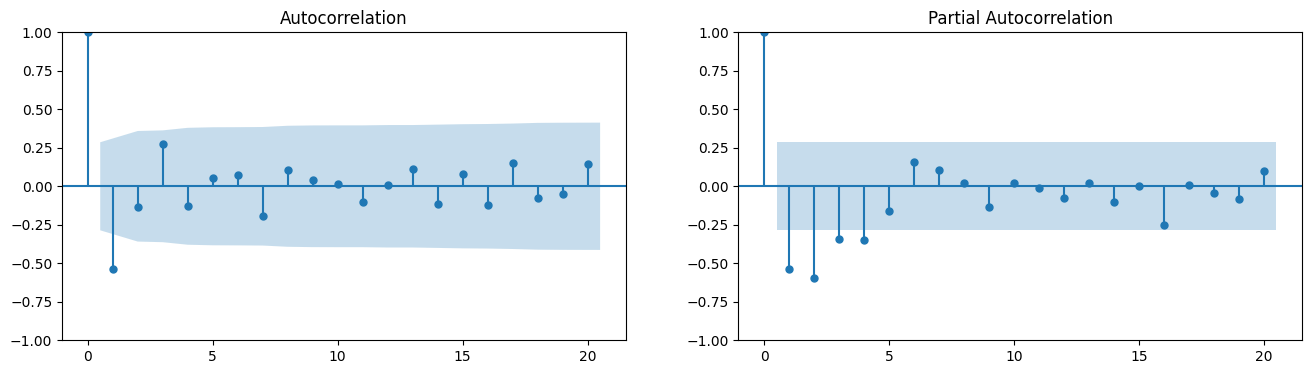

In [203]:
normal_series =  monthly_OS['y'].diff().dropna()
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(normal_series, lags=20, ax=axes[0])
plot_pacf(normal_series, lags=20, ax=axes[1])
plt.show()

In [204]:
df = monthly_OS.drop(columns=['unique_id','y_diff'])
df.set_index('ds', inplace=True)
df.head()

,y
ds,
2014-01-01,465.195522
2014-02-01,703.377333
2014-03-01,168.809556
2014-04-01,345.347750
2014-05-01,1363.929625


In [205]:
train_df = df.iloc[:-6]
test_df = df.iloc[-6:]

# Define the SARIMA model with suggested parameters
model = SARIMAX(train_df['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model
sarima_fit = model.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [206]:
# Print the model summary
print(sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   42
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -215.389
Date:                            Thu, 20 Jun 2024   AIC                            440.778
Time:                                    20:07:46   BIC                            447.615
Sample:                                01-01-2014   HQIC                           442.919
                                     - 06-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2421      0.307     -0.790      0.430      -0.843       0.359
ma.L1         -0.8651      0.219   

In [207]:
# Generate forecasts
forecast = sarima_fit.get_forecast(steps=6)
forecasted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

In [208]:
forecast_df = pd.DataFrame({
    'actual': test_df['y'],
    'forecast': forecasted_values
})

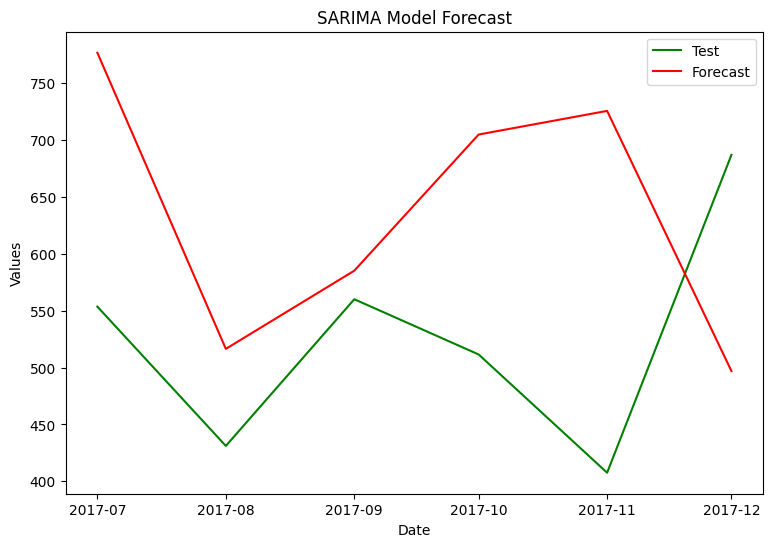

In [209]:
# Plot the results
plt.figure(figsize=(9, 6))

# plt.plot(train_df.index, train_df['y'], label='Train')
plt.plot(test_df.index, test_df['y'], label='Test', color='green')
plt.plot(test_df.index, forecasted_values, label='Forecast', color='red')
plt.title('SARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [210]:
# Calculate error metrics
mse = mean_squared_error(test_df['y'], forecasted_values)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(test_df['y'] - forecasted_values))
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

MSE: 38672.31091756833
RMSE: 196.65276737836243
MAE: 172.37880592258057


# Auto ARIMA

In [211]:
monthly_OS.head()

,ds,y,unique_id,y_diff
0,2014-01-01,465.195522,1,NaN
1,2014-02-01,703.377333,1,238.181812
2,2014-03-01,168.809556,1,-534.567778
3,2014-04-01,345.347750,1,176.538194
4,2014-05-01,1363.929625,1,1018.581875


In [212]:
df = monthly_OS[['ds','y','unique_id']]
y_train = df[:42]
y_test = df[43:]


In [213]:
y_train.shape,  y_test.shape

((42, 3), (5, 3))

In [214]:
y_test.head()

,ds,y,unique_id
43,2017-08-01,431.133167,1
44,2017-09-01,559.963526,1
45,2017-10-01,511.456241,1
46,2017-11-01,407.582646,1
47,2017-12-01,686.791242,1


In [215]:
#Defining the models
models = [
    AutoARIMA()
]

In [216]:
sf = StatsForecast(df=y_train,
                   models=models,
                   freq='M',
                   n_jobs=-1,
                   fallback_model=SeasonalNaive(season_length=12))

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [217]:
sf.fit(y_train)

StatsForecast(models=[AutoARIMA])

In [218]:
#Access dictionary of the AutoARIMA model's parameters
model_params = sf.fitted_[0][0].model_
model_params

{'coef': {'ar1': -0.08067404821373675,
  'ar2': 0.15492841143451486,
  'ar3': 0.5369292242310524,
  'ar4': 0.35208538603752654},
 'sigma2': 91972.48182371206,
 'var_coef': array([[ 0.00343241, -0.00243194, -0.0004511 , -0.00043511],
        [-0.01798609,  0.01773482, -0.00518565,  0.00432212],
        [-0.00714046, -0.02845021,  0.05446334, -0.01520822],
        [-0.00973928,  0.01521238, -0.0299258 ,  0.0229352 ]]),
 'mask': array([ True,  True,  True,  True]),
 'loglik': -299.04299634972625,
 'aic': 608.0859926994525,
 'arma': (4, 0, 0, 0, 1, 0, 0),
 'residuals': array([ 208.69701664,  240.01170921, -249.84439275, -106.47970754,
         824.18443897,   58.19516016,  432.49692704, -151.94313795,
        -274.96171559,  411.85106938,  340.22978673, -229.17140078,
        -310.06793258,  514.65667468,  357.95258213,   19.57194214,
        -303.86531427, -194.79934041,  158.6102492 , -120.66516555,
        -396.60233586,  125.27856956, -251.9728544 ,   64.70219313,
         175.1473249 

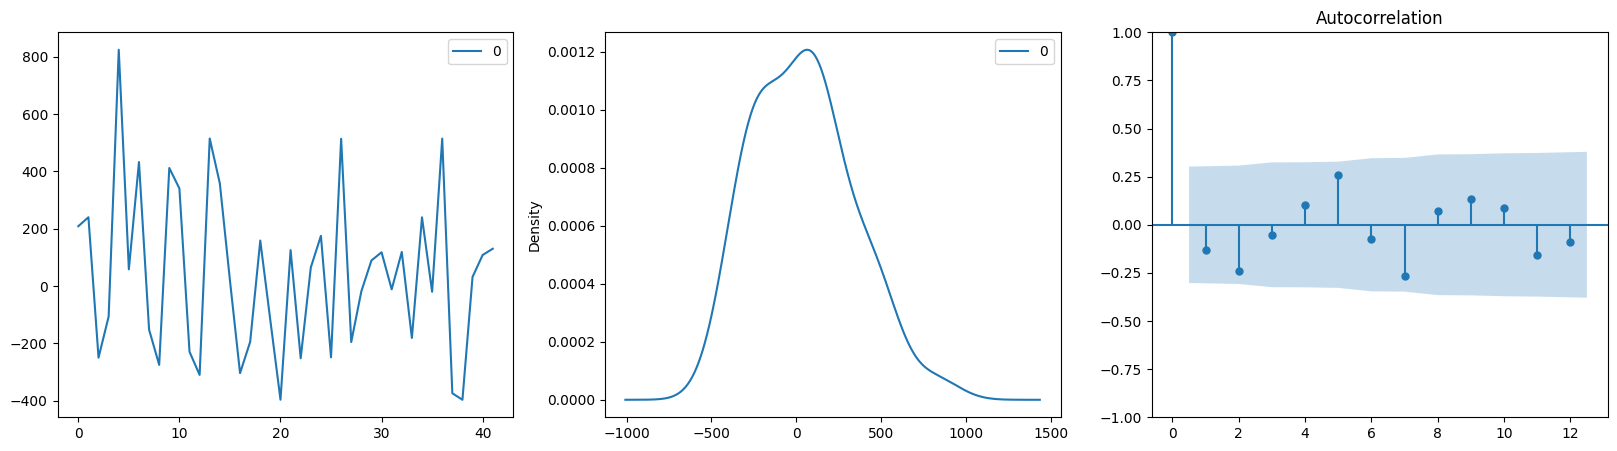

In [219]:
#Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20,5))

#Residual plot
residuals = pd.DataFrame(model_params["residuals"])
residuals.plot(ax=axes[0])

#Density plot
residuals.plot(kind='kde', ax=axes[1])

#Plot ACF for Residuals
plot_acf(residuals, lags=12, ax=axes[2])

plt.show()

In [220]:
# Summary statistics of residuals
print(residuals.describe())

                0
count   42.000000
mean    41.885802
std    288.869481
min   -396.805754
25%   -195.286724
50%     44.965881
75%    200.309594
max    824.184439


In [221]:
#Get forecast
arima_forecast = sf.forecast(h=7, level=[95])
arima_forecast

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-hi-95
unique_id,,,,
1,2017-06-30,641.688416,47.290848,1236.086060
1,2017-07-31,658.703857,62.375141,1255.032593
1,2017-08-31,529.265381,-74.734444,1133.265259
1,2017-09-30,576.707458,-99.472237,1252.887207
1,2017-10-31,615.079407,-83.097885,1313.256714
1,2017-11-30,555.825500,-145.627106,1257.278076
1,2017-12-31,546.450317,-188.238541,1281.139160


In [222]:
y_test.head()

,ds,y,unique_id
43,2017-08-01,431.133167,1
44,2017-09-01,559.963526,1
45,2017-10-01,511.456241,1
46,2017-11-01,407.582646,1
47,2017-12-01,686.791242,1


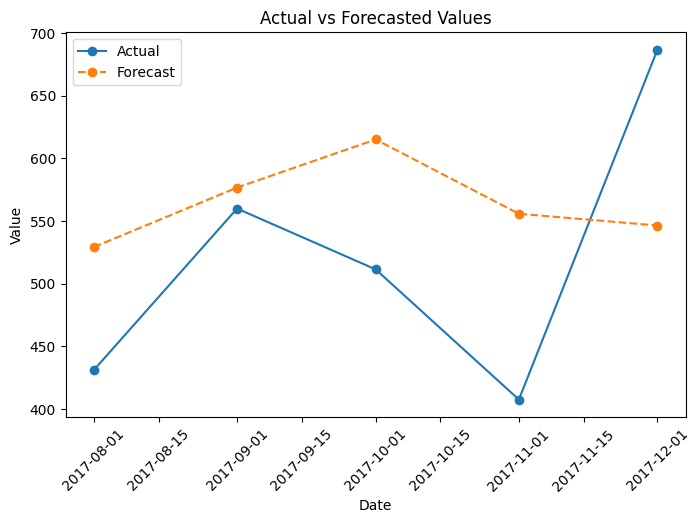

In [223]:
plt.figure(figsize=(8, 5))
plt.plot(y_test['ds'], y_test['y'], label='Actual', marker='o')
plt.plot(y_test['ds'], arima_forecast['AutoARIMA'][2:], label='Forecast', linestyle='--', marker='o')
plt.title('Actual vs Forecasted Values')
plt.xlabel('Date')
plt.xticks(rotation=45)  # Adjust rotation angle as needed
plt.ylabel('Value')
plt.legend()
plt.show()

# Prophet

In [224]:
monthly_OS.head()

,ds,y,unique_id,y_diff
0,2014-01-01,465.195522,1,NaN
1,2014-02-01,703.377333,1,238.181812
2,2014-03-01,168.809556,1,-534.567778
3,2014-04-01,345.347750,1,176.538194
4,2014-05-01,1363.929625,1,1018.581875


In [225]:
profet_df = monthly_OS.drop(columns=['unique_id'])

train_df = profet_df[:42]
test_df = profet_df[43:]

In [226]:
train_df.shape,test_df.shape

((42, 3), (5, 3))

In [227]:
#Fit model
prophet_model = Prophet(growth='linear',
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=True,
    seasonality_mode='additive').fit(train_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmplgesd94d/axhtff8s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplgesd94d/n27066hb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67943', 'data', 'file=/tmp/tmplgesd94d/axhtff8s.json', 'init=/tmp/tmplgesd94d/n27066hb.json', 'output', 'file=/tmp/tmplgesd94d/prophet_modelnzwzcnaz/prophet_model-20240620200748.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:07:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:07:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [228]:
#Make forecasts
future = prophet_model.make_future_dataframe(periods=6, freq="M")
prophet_forecast = prophet_model.predict(future)
prophet_forecast=prophet_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
prophet_forecast

,ds,yhat,yhat_lower,yhat_upper
43,2017-07-31,587.218770,268.473049,888.772140
44,2017-08-31,78.973391,-221.770231,405.504718
45,2017-09-30,1406.237072,1076.549371,1720.759594
46,2017-10-31,348.491137,38.072275,654.724803
47,2017-11-30,543.057581,200.795148,833.390972


In [229]:
forecast_df = pd.DataFrame({
    'ds': y_test['ds'],  # Assuming 'ds' is the datetime index of y_test
    'y_actual': y_test['y'],  # Actual values from y_test
    'y_forecast': prophet_forecast['yhat']  # Forecasted values
})

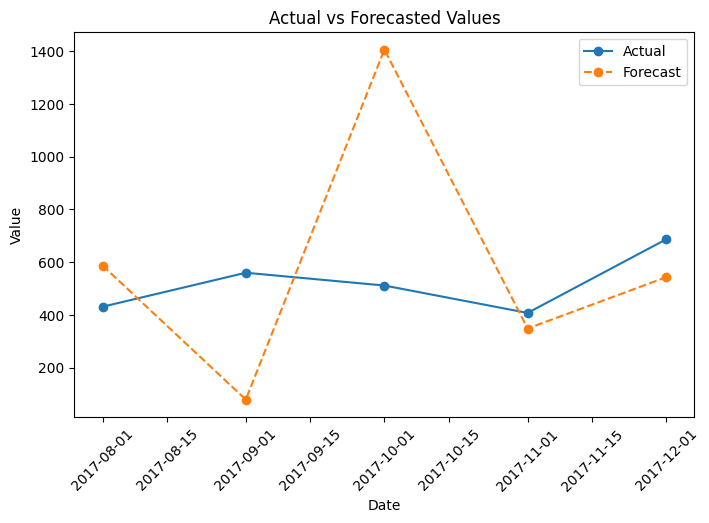

In [230]:
plt.figure(figsize=(8, 5))
plt.plot(forecast_df['ds'], forecast_df['y_actual'], label='Actual', marker='o')
plt.plot(forecast_df['ds'], forecast_df['y_forecast'], label='Forecast', linestyle='--', marker='o')
plt.title('Actual vs Forecasted Values')
plt.xlabel('Date')
plt.xticks(rotation=45)  # Adjust rotation angle as needed
plt.ylabel('Value')
plt.legend()
plt.show()

In [231]:
# Calculate error metrics
mae = mean_absolute_error(test_df['y'], prophet_forecast['yhat'])
mse = mean_squared_error(test_df['y'], prophet_forecast['yhat'])
rmse = mse ** 0.5

# Display the results and error metrics
print("Test Data Predictions:")
# print(prophet_forecast[['ds', 'yhat']].merge(test_df, on='ds', suffixes=('_predicted', '_actual')))
print("\nError Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Test Data Predictions:

Error Metrics:
Mean Absolute Error (MAE): 346.9363475284787
Mean Squared Error (MSE): 216099.6264013545
Root Mean Squared Error (RMSE): 464.8651701314635


# Multivariate forecasting

# Vector Auto Regressive



In [232]:
OS_main = df_main[['Order Date','Sales','Quantity','Discount','Profit','Category']]
OS=OS_main.loc[df_main['Category']=='Office Supplies']


In [233]:
OS.columns

Index(['Order Date', 'Sales', 'Quantity', 'Discount', 'Profit', 'Category'], dtype='object')

In [234]:
# Ensure 'Order Date' is in datetime format
OS['Order Date'] = pd.to_datetime(OS['Order Date'])

# Set 'Order Date' as the index
OS.set_index('Order Date', inplace=True)

# Create a new DataFrame with monthly resampled data
monthly_df = pd.DataFrame()

# Resample the data to monthly frequency and take the mean for each month
monthly_df['Sales'] = OS['Sales'].resample('MS').mean()
monthly_df['Quantity'] = OS['Quantity'].resample('MS').mean()
monthly_df['Discount'] = OS['Discount'].resample('MS').mean()
monthly_df['Profit'] = OS['Profit'].resample('MS').mean()

# Reset the index to turn the 'Order Date' back into a column
OS = monthly_df.reset_index()

# Display the first few rows of the new DataFrame
OS.tail()

<ipython-input-234-8f57a1622dc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OS['Order Date'] = pd.to_datetime(OS['Order Date'])


,Order Date,Sales,Quantity,Discount,Profit
43,2017-08-01,210.208755,4.286713,0.148951,42.432575
44,2017-09-01,112.309306,3.683099,0.151761,17.069520
45,2017-10-01,135.512894,3.835294,0.177059,23.769265
46,2017-11-01,117.873921,4.093633,0.165543,13.517239
47,2017-12-01,108.316520,3.775801,0.144484,6.314282


In [235]:
# Calculate the correlation matrix
correlation_matrix = OS[['Sales', 'Quantity', 'Discount', 'Profit']].corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
              Sales  Quantity  Discount    Profit
Sales     1.000000  0.357216 -0.007526  0.413534
Quantity  0.357216  1.000000 -0.227909  0.203938
Discount -0.007526 -0.227909  1.000000 -0.274716
Profit    0.413534  0.203938 -0.274716  1.000000


### Granger causality test

In [238]:
# Function to perform Granger causality test with Sales column
def granger_causality_with_sales(data, columns, target_column='Sales', max_lag=12, significance_level=0.05):
    results = {}
    for column in columns:
        if column != target_column:
            # Create a DataFrame with two columns for the test
            test_data = pd.DataFrame({'Target': data[target_column], 'Feature': data[column]})
            # Perform Granger causality test
            granger_test = grangercausalitytests(test_data, max_lag, verbose=False)
            # Extract and store the p-values
            p_values = [granger_test[i+1][0]['ssr_ftest'][1] for i in range(max_lag)]
            # Determine if any p-value is less than significance level
            significant = any(p < significance_level for p in p_values)
            # Store results
            results[column] = {'p_values': p_values, 'significant': significant}
    return results

# Perform Granger causality test for all pairs of columns
granger_results = granger_causality_with_sales(df,['Sales', 'Quantity', 'Discount', 'Profit'])

# Print results
print(f'Granger causality results with Sales column:')
for key, value in granger_results.items():
    print(f'\t{key}:')
    print(f'\t\tP-values: {value["p_values"]}')
    if value["significant"]:
        print(f'\t\tThere is Granger causality from {key} to Sales')
    else:
        print(f'\t\tNo significant Granger causality found from {key} to Sales')
    print()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Granger causality results with Sales column:
	Quantity:
		P-values: [0.24942677187198142, 0.3719520689243083, 0.4790952779648048, 0.6483978301832908, 0.9409051363852047, 0.9934964664256587, 0.9878974864828008, 0.9370950374428285, 0.7576853470574922, 0.797645295170734, 0.897797667088016, 0.8147719477492229]
		No significant Granger causality found from Quantity to Sales

	Discount:
		P-values: [0.0038745634909869635, 0.0025152782413011532, 0.00024820733395178367, 0.002684055585460957, 0.00963536546936236, 0.025446544454063826, 0.07184343843198315, 0.1407308218063954, 0.03248785089076193, 0.07076563405077801, 0.11688878369790108, 0.09847377867241196]
		There is Granger causality from Discount to Sales

	Profit:
		P-values: [0.011408846784483348, 0.03066101431791427, 0.02805759385895021, 0.06094505970237389, 0.0335935113707061, 0.021714308579189358, 0.06698155532329518, 0.0698138884620007, 0.10885655740046911, 0.16771496330106037, 0.35378556795668986, 0.13162049220986366]
		There is Grang

### We find the profit is best among all features



In [236]:
df = OS[['Sales','Profit']]


### Stationary Test For All Columns

In [237]:
def check_stationarity(series):
    result = adfuller(series)
    print(f'Results of Dickey-Fuller Test for {column}:')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] < 0.05:
        print(f'The {column} series is stationary.\n')
    else:
        print(f'The {column} series is not stationary.\n')

# Check stationarity and apply differencing if needed
for column in df.columns:
    print(f'Checking stationarity for {column}:')
    check_stationarity(df[column])
    print()

Checking stationarity for Sales:
Results of Dickey-Fuller Test for Sales:
ADF Statistic: -6.100365254423857
p-value: 9.869101392257422e-08
The Sales series is stationary.


Checking stationarity for Quantity:
Results of Dickey-Fuller Test for Quantity:
ADF Statistic: -3.6950739692172965
p-value: 0.0041829791276896955
The Quantity series is stationary.


Checking stationarity for Discount:
Results of Dickey-Fuller Test for Discount:
ADF Statistic: -7.114531421345232
p-value: 3.8615231196106155e-10
The Discount series is stationary.


Checking stationarity for Profit:
Results of Dickey-Fuller Test for Profit:
ADF Statistic: -6.129848437730449
p-value: 8.453601560014586e-08
The Profit series is stationary.




In [239]:
var_model = VAR(df[["Sales", "Profit"]])
for i in range(1,10):
    result = var_model.fit(i)
    print('Lag =', i)
    print('AIC : ', result.aic)

Lag = 1
AIC :  12.57750132158997
Lag = 2
AIC :  12.658603614478768
Lag = 3
AIC :  12.774001538919885
Lag = 4
AIC :  12.86877829194768
Lag = 5
AIC :  12.873983865456603
Lag = 6
AIC :  12.946850768536383
Lag = 7
AIC :  12.490085776399683
Lag = 8
AIC :  11.640808214767876
Lag = 9
AIC :  11.697532786771742


In [240]:
#Alternative method
var_model.select_order(12).summary()

,AIC,BIC,FPE,HQIC
0,12.22,12.30,2.018e+05,12.25
1,11.76,12.02*,1.280e+05,11.85*
2,11.91,12.35,1.499e+05,12.07
3,12.10,12.71,1.815e+05,12.31
4,12.07,12.87,1.793e+05,12.35
5,12.06,13.03,1.805e+05,12.40
6,12.19,13.34,2.116e+05,12.59
7,12.38,13.70,2.643e+05,12.84
8,11.58,13.07,1.257e+05*,12.10
9,11.74,13.41,1.590e+05,12.32


### Since AIC dropped to the minimum for lag 12, we'll use that as the order.

In [241]:
OS.head()

,Order Date,Sales,Quantity,Discount,Profit
0,2014-01-01,97.021600,3.380000,0.134000,15.779012
1,2014-02-01,34.571742,3.322581,0.229032,5.680355
2,2014-03-01,84.371363,3.627451,0.150980,12.455032
3,2014-04-01,134.398482,4.156627,0.106024,12.050706
4,2014-05-01,100.501746,3.957746,0.129577,24.608513


In [242]:
df = OS[["Sales", "Profit"]]
df.head()

,Sales,Profit
0,97.021600,15.779012
1,34.571742,5.680355
2,84.371363,12.455032
3,134.398482,12.050706
4,100.501746,24.608513


In [243]:
train_df = df[:42]
test_df = df[43:]

In [244]:
#Build model
var_model = VAR(train_df[["Sales", "Profit"]].dropna()).fit(12)

In [245]:
#Model summary
var_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 20, Jun, 2024
Time:                     20:07:49
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    12.0589
Nobs:                     30.0000    HQIC:                   10.4707
Log likelihood:          -180.990    FPE:                    72116.9
AIC:                      9.72359    Det(Omega_mle):         21456.3
--------------------------------------------------------------------
Results for equation Sales
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const            617.068957       350.855890            1.759           0.079
L1.Sales          -0.607709         0.473648           -1.283           0.199
L1.Profit          2.356669         1.531978            1.538           

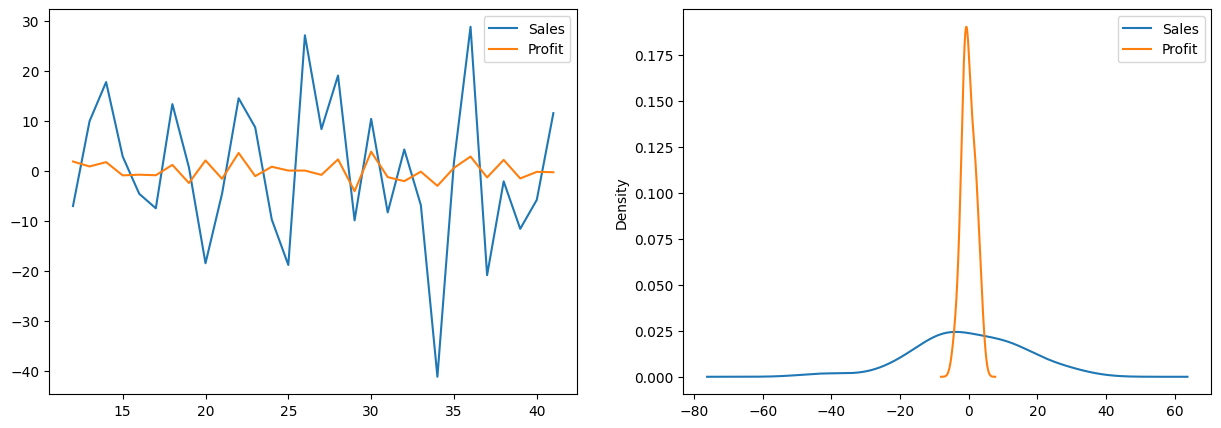

In [246]:
#Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15,5))

#Residual plot
residuals = pd.DataFrame(var_model.resid)
residuals.plot(ax=axes[0])

#Density plot
residuals.plot(kind='kde', ax=axes[1])

plt.show()

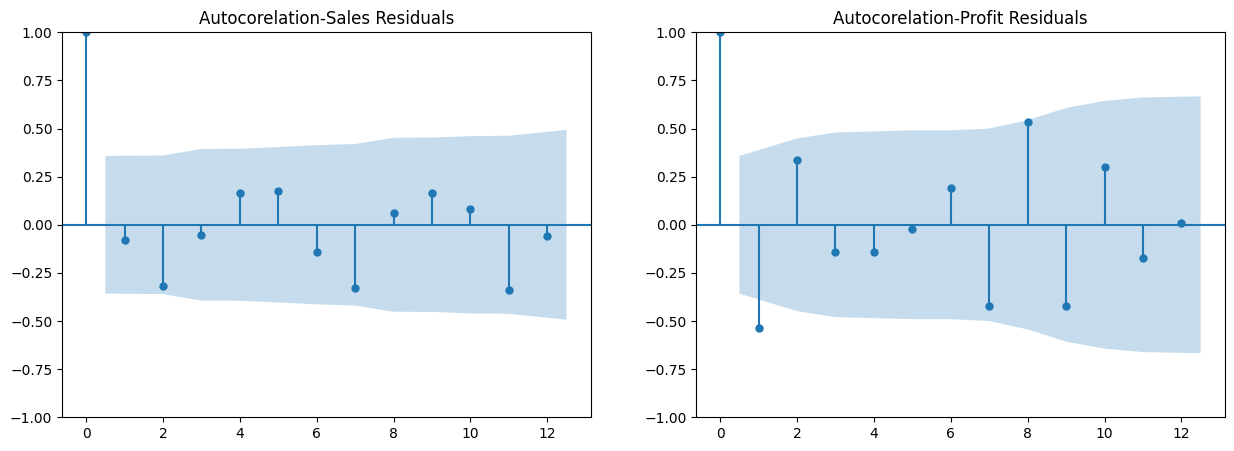

In [247]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

#Plot ACF for Sales Residuals
plot_acf(residuals["Sales"], lags=12, ax=axes[0])
axes[0].set_title("Autocorelation-Sales Residuals")

#Plot ACF for Profit Residuals
plot_acf(residuals["Profit"], lags=12, ax=axes[1])
axes[1].set_title("Autocorelation-Profit Residuals")

plt.show()

In [248]:
# Summary statistics of residuals
print(residuals.describe())

              Sales        Profit
count  3.000000e+01  3.000000e+01
mean  -3.481659e-14 -1.525298e-13
std    1.509344e+01  1.926043e+00
min   -4.125259e+01 -4.122901e+00
25%   -8.168553e+00 -1.261329e+00
50%   -7.687982e-01 -2.381806e-01
75%    1.021625e+01  1.544567e+00
max    2.876025e+01  3.770558e+00


### Forecast

In [249]:
# Forecast
lag_order = 12
var_forecast = var_model.forecast(train_df[["Sales", "Profit"]].values[-lag_order:], steps=len(test_df))

# Convert forecast to a DataFrame
forecast_df = pd.DataFrame(var_forecast, index=test_df.index, columns=["Sales", "Profit"])
forecast_df.head()

,Sales,Profit
43,106.989364,36.234324
44,124.161260,26.171421
45,121.599679,35.447575
46,111.646300,19.370392
47,130.029935,38.555496


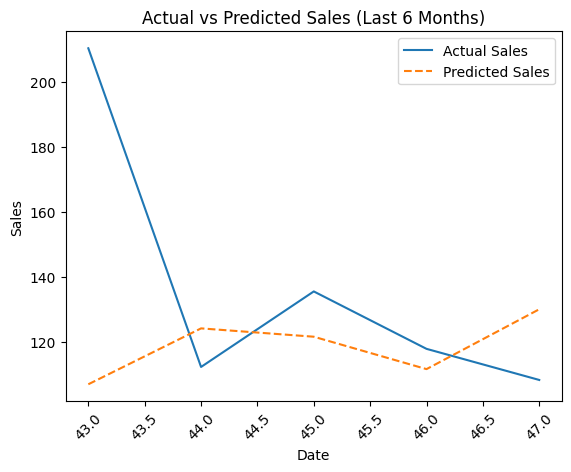

In [250]:
plt.plot(test_df.index, test_df['Sales'], label='Actual Sales')
plt.plot(forecast_df.index, forecast_df['Sales'], label='Predicted Sales', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.xticks(rotation=45)  # Adjust rotation angle as needed
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (Last 6 Months)')
plt.show()